# The main purpose of this project was to learn Time series analysis on Superstore dataset leveraging the SARIMAX model 

In [1]:
# Importing all the required libraries
import pandas as pd
import numpy as np
import itertools   

# itertools is a powerful module that provides various tools for efficient iteration and combination of elements. 
# It offers functions to generate iterators for common tasks such as permutations, combinations, 
                                                                #and cartesian products.

#Importing plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import statsmodels.api as sm # for plotting decomposition graphs
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_excel('Superstore.xlsx')

In [3]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [4]:
df.tail()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.248,3,0.2,4.1028
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.960,2,0.0,15.6332
9991,9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.576,2,0.2,19.3932
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.600,4,0.0,13.3200
9993,9994,CA-2017-119914,2017-05-04,2017-05-09,Second Class,CC-12220,Chris Cortes,Consumer,United States,Westminster,...,92683,West,OFF-AP-10002684,Office Supplies,Appliances,"Acco 7-Outlet Masterpiece Power Center, Wihtou...",243.160,2,0.0,72.9480


In [5]:
df.shape

(9994, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [7]:
unique_categories = set(df['Category'])
unique_categories

{'Furniture', 'Office Supplies', 'Technology'}

# Data Preprocessing

Lets analyse the time series of furniture sales category over other category

In [8]:
furniture = df.loc[df['Category'] == 'Furniture']

# This shows that we have time-series data of 4 years for furniture sales.
print(furniture['Order Date'].min())
print(furniture['Order Date'].max())

2014-01-06 00:00:00
2017-12-30 00:00:00


In [9]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [10]:
# Creating a columns list with leaving out just the order date and sales

cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Quantity', 'Discount', 'Profit'] 

furniture.drop(cols, axis=1, inplace=True)

In [11]:
furniture.isna().sum()

Order Date    0
Sales         0
dtype: int64

In [12]:
furniture.sort_values('Order Date', inplace=True)

In [13]:
furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()
furniture

,Order Date,Sales
0,2014-01-06,2573.8200
1,2014-01-07,76.7280
2,2014-01-10,51.9400
3,2014-01-11,9.9400
4,2014-01-13,879.9390
...,...,...
884,2017-12-24,1393.4940
885,2017-12-25,832.4540
886,2017-12-28,551.2568
887,2017-12-29,2330.7180


# Indexing Time Series Date

In [14]:
# Always set the index to the order date

furniture = furniture.set_index('Order Date') 

In [15]:
furniture.index

DatetimeIndex(['2014-01-06', '2014-01-07', '2014-01-10', '2014-01-11',
               '2014-01-13', '2014-01-14', '2014-01-16', '2014-01-19',
               '2014-01-20', '2014-01-21',
               ...
               '2017-12-18', '2017-12-19', '2017-12-21', '2017-12-22',
               '2017-12-23', '2017-12-24', '2017-12-25', '2017-12-28',
               '2017-12-29', '2017-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=889, freq=None)

In [16]:
y = furniture['Sales'].resample('MS').mean()

In [17]:
y['2017':]

Order Date
2017-01-01     397.602133
2017-02-01     528.179800
2017-03-01     544.672240
2017-04-01     453.297905
2017-05-01     678.302328
2017-06-01     826.460291
2017-07-01     562.524857
2017-08-01     857.881889
2017-09-01    1209.508583
2017-10-01     875.362728
2017-11-01    1277.817759
2017-12-01    1256.298672
Freq: MS, Name: Sales, dtype: float64

# Furniture Data Time Series Analysis

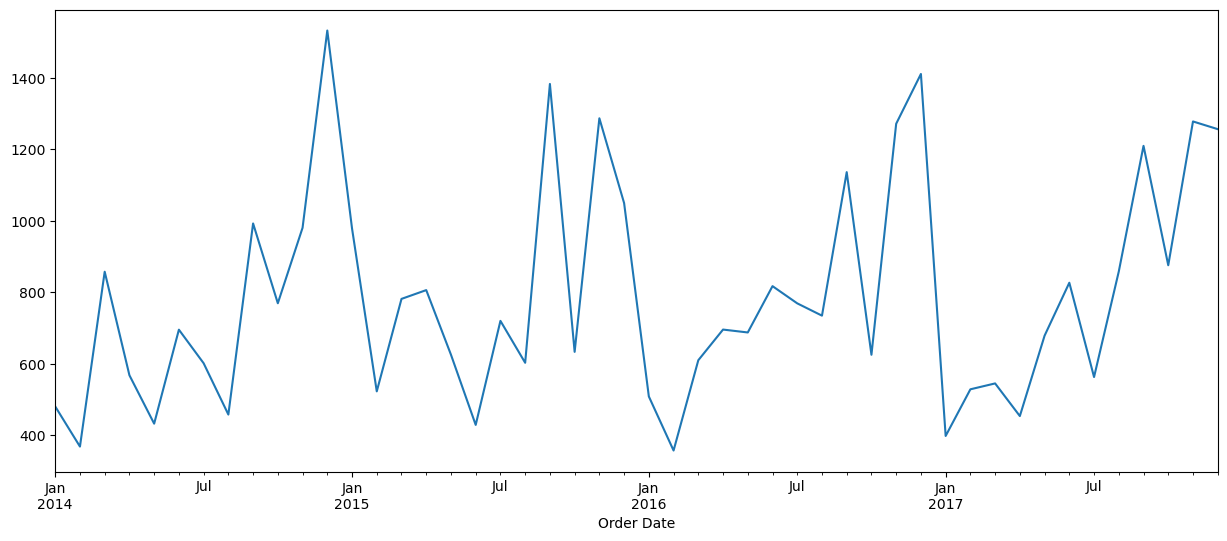

In [18]:
y.plot(figsize=(15,6))
plt.show()

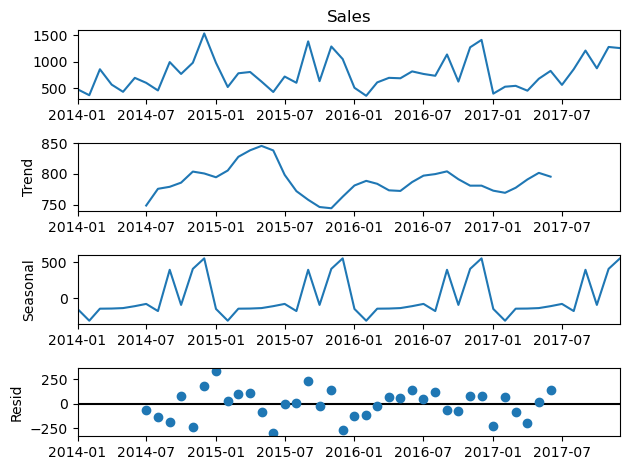

In [19]:
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
decomposition.plot()
plt.show()

The above plot shows that the sales of furniture is highly unstable with seasonality and trend easily observable.

# Time Series forecasting with ARIMA Model

ARIMA models are donated with the notation: ARIMA (p, d, q) where:

1. p denotes seasonality
2. d denotes trend
3. q denotes noise in data

Configuring a SARIMA requires selecting hyperparameters for both the trend and seasonal components of the series.

Trend Components:

1. p denotes Trend autoregression order
2. d denotes Trend difference order
3. q denotes Trend moving average order

Seasonality Components:

1. p denotes Seasonal autoregressive order.
2. d denotes Seasonal difference order.
3. q denotes Seasonal moving average order.
4. m denotes the number of time steps for a single seasonal period.

In [20]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in pdq]

print('Few parameter combinations are:')
print('{} x {}'.format(pdq[1], seasonal_pdq[1]))
print('{} x {}'.format(pdq[2], seasonal_pdq[2]))

Few parameter combinations are:
(0, 0, 1) x (0, 0, 1, 12)
(0, 1, 0) x (0, 1, 0, 12)


Now that we've generated all possible parameters for our SARIMA model, we shall find out the best parameter to train the model on it finally.

SARIMA stands for Seasonal AutoRegressive Integrated Moving Average model which is an extension of ARIMA model used in modeling the seasonality component as well. So, we need not to make time-series stationary (non-seasonal) first before forecasting.

In [21]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            model = sm.tsa.statespace.SARIMAX(y, order=param, seasonal_order=param_seasonal,
                                             enforce_stationarity=False, enforce_invertibility=False)
            results = model.fit(disp=0)  # Added `disp=0` to suppress convergence output
            print('ARIMA {} x {} - AIC: {}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA (0, 0, 0) x (0, 0, 0, 12) - AIC: 769.0817523205915
ARIMA (0, 0, 0) x (0, 0, 1, 12) - AIC: 1356.5153755332822
ARIMA (0, 0, 0) x (0, 1, 0, 12) - AIC: 477.7170130919703
ARIMA (0, 0, 0) x (0, 1, 1, 12) - AIC: 302.27028997936475
ARIMA (0, 0, 0) x (1, 0, 0, 12) - AIC: 497.2314433418338
ARIMA (0, 0, 0) x (1, 0, 1, 12) - AIC: 1082.5268529932766
ARIMA (0, 0, 0) x (1, 1, 0, 12) - AIC: 318.0047199116341
ARIMA (0, 0, 0) x (1, 1, 1, 12) - AIC: 304.2488280303266
ARIMA (0, 0, 1) x (0, 0, 0, 12) - AIC: 720.9252270758096
ARIMA (0, 0, 1) x (0, 0, 1, 12) - AIC: 2719.855353807601
ARIMA (0, 0, 1) x (0, 1, 0, 12) - AIC: 466.56074298091517
ARIMA (0, 0, 1) x (0, 1, 1, 12) - AIC: 291.62613896732995
ARIMA (0, 0, 1) x (1, 0, 0, 12) - AIC: 499.6135180640408
ARIMA (0, 0, 1) x (1, 0, 1, 12) - AIC: 2339.1279844000655
ARIMA (0, 0, 1) x (1, 1, 0, 12) - AIC: 319.98848769468657
ARIMA (0, 0, 1) x (1, 1, 1, 12) - AIC: 291.87255784532994
ARIMA (0, 1, 0) x (0, 0, 0, 12) - AIC: 677.8947668259312
ARIMA (0, 1, 0) x (0, 0

The lowest AIC value is 283.366 for ARIMA (1,1,1) x (1,1,1,12). So we shall use these parameters in our model.

Here, the Akaike information criterion (AIC) is an estimator of the relative quality of statistical models for a given set of data. Given a collection of models for the data, AIC estimates the quality of each model, relative to each of the other models. Thus, AIC provides a means for model selection.

AIC estimates the relative amount of information lost by a given model: the less information a model loses (less AIC value), the higher the quality of that model.

In [22]:
# Training the ARIMA Model

model = sm.tsa.statespace.SARIMAX(y, order=(1,1,1), seasonal_order=(1,1,1,12),
                                             enforce_stationarity=False, enforce_invertibility=False)
results = model.fit(disp=0)
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0949      0.313     -0.303      0.762      -0.708       0.518
ma.L1         -1.0000      0.415     -2.409      0.016      -1.813      -0.186
ar.S.L12      -0.0036      0.424     -0.008      0.993      -0.834       0.826
ma.S.L12      -0.3014      0.501     -0.602      0.547      -1.283       0.680
sigma2      2.476e+04   1.68e-05   1.48e+09      0.000    2.48e+04    2.48e+04


# Validating the model forecasts

To validate the model results, we compare the actual sales with the predicted sales of the time series data starting from 2017/01/01 till the end of the data.

In [23]:
pred = results.get_prediction(start = pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()
pred_ci

,lower Sales,upper Sales
Order Date,,
2017-01-01,333.963735,970.402282
2017-02-01,118.575079,754.741679
2017-03-01,365.228232,1000.274027
2017-04-01,423.616493,1057.669313
2017-05-01,364.919920,998.084170
2017-06-01,407.640065,1040.004667
2017-07-01,427.763684,1059.404905
2017-08-01,385.550107,1016.533853
2017-09-01,853.973076,1484.356689


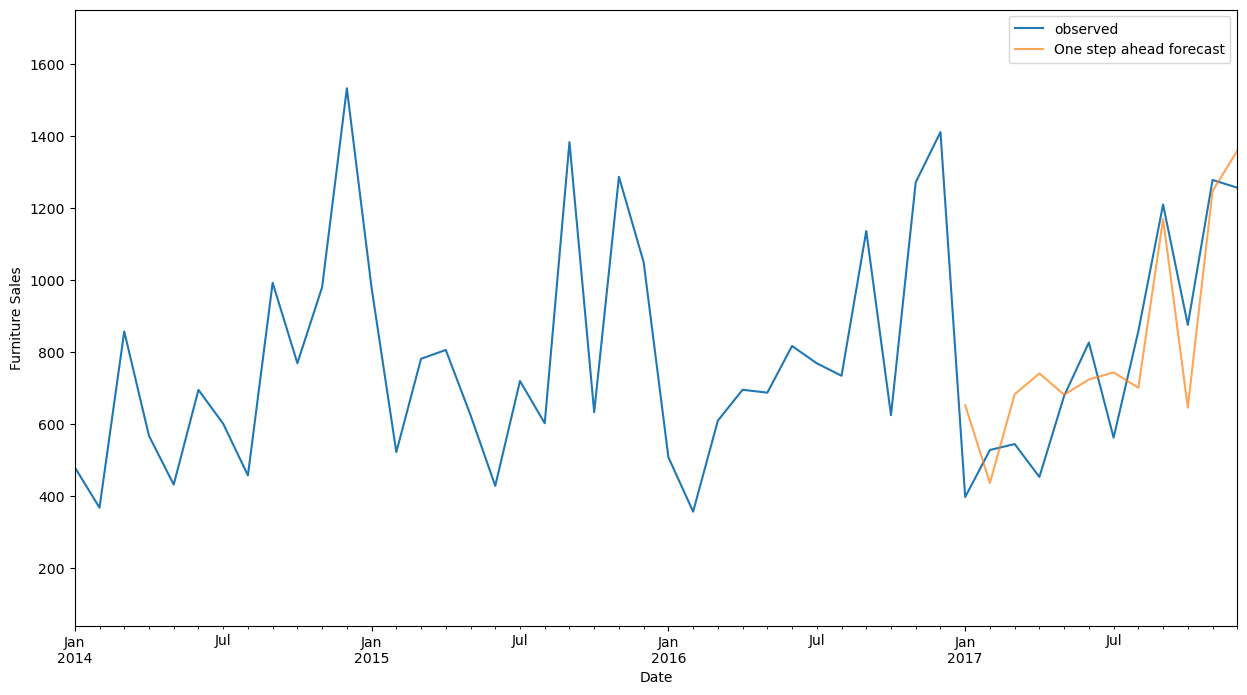

In [24]:
ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One step ahead forecast', alpha=.7, figsize=(15,8))
ax.fill_between(pred_ci.index,
               pred_ci.iloc[:, 0],
               pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

The above plot demonstrates that the predicted values alligns well with the true values capturing an upward seasonality. Now, we calculate the Mean Square Error of our predicted values wrt the orignal values.

In [25]:
y_predicted = pred.predicted_mean
y_true = y['2017-01-01': ]
mse = ((y_predicted - y_true)**2).mean()
print('Mean squared error is', mse)
print('Root mean squared error is', np.sqrt(mse))

Mean squared error is 25714.250988387797
Root mean squared error is 160.3566368704077


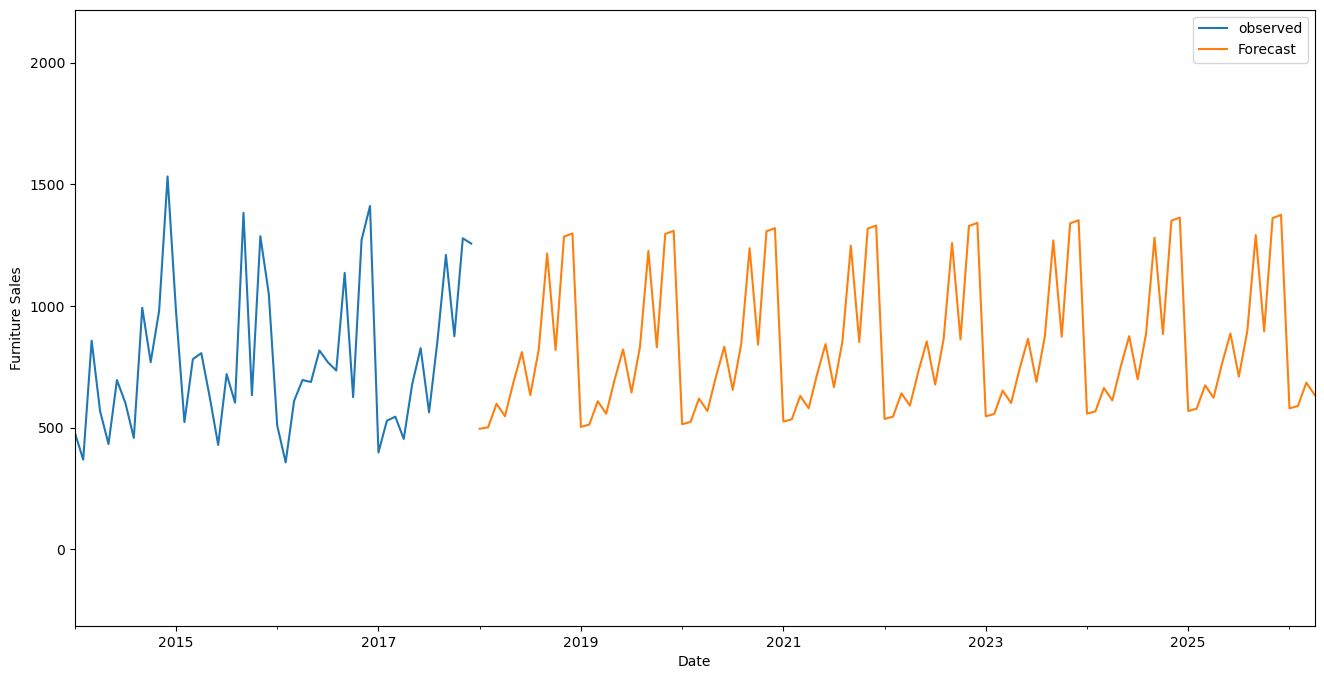

In [26]:
# Forecasting the future (out of sample) values.

pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(16, 8))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()
